In [1]:
from random import choice
from numpy import array, dot, random

In [2]:
# Create a step function, in reference to Mathematica
unit_step = lambda x: 0 if x < 0 else 1

Now, Map the possible input to expected output.
First two enteries of the array in each tuple are the two input values.
Third entry of the array is the bias(decision boundary), which is needed to move the threshold up and down as needed by the step function.
The second element of the tuple is the expected result.

In [3]:
# Training sequence maps exactly to the definition of the OR function.
training_data_OR = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

training_data_AND = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 0),
    (array([1,0,1]), 0),
    (array([1,1,1]), 1),
]

training_data_NOR = [
    (array([0,0,1]), 1),
    (array([0,1,1]), 0),
    (array([1,0,1]), 0),
    (array([1,1,1]), 0),
]

training_data_NAND = [
    (array([0,0,1]), 1),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 0),
]

In [4]:
# Choose three random numbers between 0 adn 1 as the initial weights.
w = random.rand(3)

In [5]:
# errors list used to store the error values in order to plot them later.
errors = []
# eta variable controls the learning rate
eta = 0.2
# n specifies the number of learning iterations
n = 80

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero.

Now we get a random input set from the training data and calculate the dot product of the input and weight vectors. This is our (scalar) result, which we compare to the expected result.

If the expected result is bigger, we need to incrrease the weights, if it's smaller we need to decrease them.This correction factor is calculated by mutiplying the error with the learning rate and the input vector.
It is then added to the weights vector, in order to improve the results in the next iteration.

In [6]:
for i in range(n):
    x, expected = choice(training_data_NOR)
    result = dot(w, x)
    error = expected - unit_step(result)
#     print("weights: ", w)
#     print("Input: {} \t Result: {} \t Error: {} \n".format(x, result, error))
    errors.append(error)
    w += eta * error * x

In [7]:
# Iterate the respective training data to see the results
for x, _ in training_data_NOR:
    result = dot(w, x)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: 0.11948571383969919 -> 1
[0 1]: -0.1323571461176214 -> 0
[1 0]: -0.13283817813104004 -> 0
[1 1]: -0.3846810380883606 -> 0


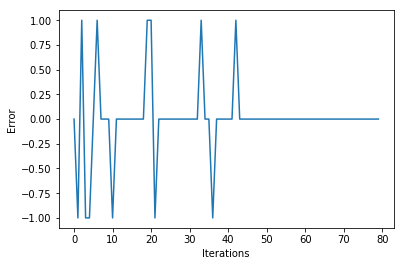

In [9]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()